https://docs.monai.io/en/latest/visualize.html

monai.visualize.img2tensorboard.add_animated_gif
monai.visualize.img2tensorboard.plot_2d_or_3d_image
monai.visualize.class_activation_maps.CAM
monai.visualize.class_activation_maps.GradCAM
monai.visualize.occlusion_sensitivity.OcclusionSensitivity

CLASS ACTIVATION MAP

In [1]:
import torch
from monai.visualize import CAM
import torch
import torchio as tio
import numpy as np
import matplotlib.pyplot as plt 
import os

# global settings
base_path = '/mnt/data_lab513/vqtran_data'
root_data = os.path.join(base_path, "data", "raw_data", "ADNI_NIfTI")
root_bias_correction = os.path.join(base_path, "data", "clean_data", "mri_bias_correction")
root_bet = os.path.join(base_path, "data", "clean_data", "mri_brain_extraction")
root_reg = os.path.join(base_path, "data", "clean_data", "mri_registration")
root_meta = os.path.join(base_path, "data", "meta_data")#, "Pre-Thesis_metadata", "ADNI") 
root_train = os.path.join(base_path, "data", "train_data")

READ IN NIFTI IMAGE AS NUMPY ARRAY

In [2]:
import nibabel as nib
sample_dir = os.path.join(root_reg,'ADNI_011_S_4912_MR_MPRAGE_br_raw_20130315145415974_174_S184571_I363474.nii.gz')
sample_img = nib.load(sample_dir)
sample_img_data = sample_img.get_fdata()
sample_img_data.shape #(182, 218, 182)
# sample_img_data.dtype  #dtype('float64')

(182, 218, 182)

CONVERT NUMPY ARRAY TO TORCH TENSOR

In [3]:
sample_image_tensor = torch.Tensor(sample_img_data)
print(sample_image_tensor.shape)
print(sample_image_tensor.dtype)

torch.Size([182, 218, 182])
torch.float32


SHOW_PLOT FUNCTIONS

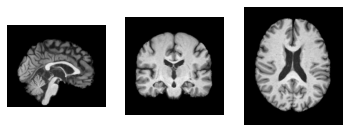

In [4]:
import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    
    for i, slice in enumerate(slices):
        plt.axis('off')
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis('off')
         
def create_and_show_slices(data_volume):
    if (len(data_volume.shape) == 4):
        print(data_volume.shape)
        img_data = torch.squeeze(data_volume,0)
    else:
        img_data = data_volume
        
    slice_0 = img_data[img_data.shape[0]//2, :, :]
    slice_1 = img_data[:, img_data.shape[1]//2, :]
    slice_2 = img_data[:, :, img_data.shape[2]//2]
    
    show_slices([slice_0, slice_1, slice_2])
    # plt.suptitle("Center slices for EPI image")  

create_and_show_slices(sample_image_tensor)

In [5]:
import torch

# densenet 2d
from monai.networks.nets import DenseNet121
from monai.visualize import CAM

model_2d = DenseNet121(spatial_dims=2, in_channels=1, out_channels=3)
cam = CAM(nn_module=model_2d, target_layers="class_layers.relu", fc_layers="class_layers.out")
result = cam(x=torch.rand((1, 1, 48, 64)))

# resnet 2d
from monai.networks.nets import SEResNet50
from monai.visualize import CAM

model_2d = SEResNet50(spatial_dims=2, in_channels=3, num_classes=4)
cam = CAM(nn_module=model_2d, target_layers="layer4", fc_layers="last_linear")
result = cam(x=torch.rand((2, 3, 48, 64)))

/home/vqtran/miniconda3/envs/summer_thesis/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [8]:
# print(model_2d)
for name, _ in model_2d.named_modules(): print(name)


layer0
layer0.conv1
layer0.bn1
layer0.relu1
layer0.pool
layer1
layer1.0
layer1.0.conv1
layer1.0.conv1.conv
layer1.0.conv1.adn
layer1.0.conv1.adn.N
layer1.0.conv1.adn.A
layer1.0.conv2
layer1.0.conv2.conv
layer1.0.conv2.adn
layer1.0.conv2.adn.N
layer1.0.conv2.adn.A
layer1.0.conv3
layer1.0.conv3.conv
layer1.0.conv3.adn
layer1.0.conv3.adn.N
layer1.0.se_layer
layer1.0.se_layer.avg_pool
layer1.0.se_layer.fc
layer1.0.se_layer.fc.0
layer1.0.se_layer.fc.1
layer1.0.se_layer.fc.2
layer1.0.se_layer.fc.3
layer1.0.project
layer1.0.project.conv
layer1.0.project.adn
layer1.0.project.adn.N
layer1.0.act
layer1.1
layer1.1.conv1
layer1.1.conv1.conv
layer1.1.conv1.adn
layer1.1.conv1.adn.N
layer1.1.conv1.adn.A
layer1.1.conv2
layer1.1.conv2.conv
layer1.1.conv2.adn
layer1.1.conv2.adn.N
layer1.1.conv2.adn.A
layer1.1.conv3
layer1.1.conv3.conv
layer1.1.conv3.adn
layer1.1.conv3.adn.N
layer1.1.se_layer
layer1.1.se_layer.avg_pool
layer1.1.se_layer.fc
layer1.1.se_layer.fc.0
layer1.1.se_layer.fc.1
layer1.1.se_layer.

In [13]:
import monai
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
monai.visualize.img2tensorboard.plot_2d_or_3d_image(result, 0, writer)

OCCLUSION SENSITIVITY

In [14]:
# # densenet 2d
# from monai.networks.nets import DenseNet121
# from monai.visualize import OcclusionSensitivity

# model_2d = DenseNet121(spatial_dims=2, in_channels=1, out_channels=3)
# occ_sens = OcclusionSensitivity(nn_module=model_2d)
# occ_map, most_probable_class = occ_sens(x=torch.rand((1, 1, 48, 64)), b_box=[-1, -1, 2, 40, 1, 62])

# # densenet 3d
# from monai.networks.nets import DenseNet
# from monai.visualize import OcclusionSensitivity

# model_3d = DenseNet(spatial_dims=3, in_channels=1, out_channels=3, init_features=2, growth_rate=2, block_config=(6,))
# occ_sens = OcclusionSensitivity(nn_module=model_3d, n_batch=10, stride=3)
# occ_map, most_probable_class = occ_sens(torch.rand(1, 1, 6, 6, 6), b_box=[-1, -1, 1, 3, -1, -1, -1, -1])

In [6]:
# help(monai.visualize.visualizer)